In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Write a program in Python to implement spatial domain averaging filter and to observe its blurring effect on the image without using inbuilt functions 

In [2]:

def averaging_filter(image_path, kernel_size=5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = image.shape
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    
    # Applying the filter
    for i in range(rows - kernel_size + 1):
        for j in range(cols - kernel_size + 1):
            roi = image[i:i+kernel_size, j:j+kernel_size]
            filtered_value = int(np.sum(np.multiply(roi, kernel)))
            filtered_image[i+kernel_size//2, j+kernel_size//2] = filtered_value
    
    return filtered_image,image

2. To write a program in Python to implement spatial domain median filter to remove salt and pepper noise without using inbuilt functions

In [3]:
def median_filter(image_path, kernel_size):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rows, cols = image.shape
  filtered_image = np.zeros_like(image, dtype=np.uint8)
  
  for i in range(rows - kernel_size + 1):
      for j in range(cols - kernel_size + 1):
          roi = image[i:i+kernel_size, j:j+kernel_size]
          median_value = int(np.median(roi))
          filtered_image[i+kernel_size//2, j+kernel_size//2] = median_value
  
  return filtered_image


3.   Plot original, normalized and equalized histogram  for the following images.

In [4]:
def plot_histogram(image_path):
  image = cv2.imread(image_path)
  hist = cv2.calcHist([image], [0], None, [256], [0, 255])
  # Plot the original histogram
  plt.subplot(2, 2, 1)
  plt.title("Original Histogram")
  plt.plot(hist)

  # Normalize the histogram
  hist_norm = hist / np.sum(hist)

  # Plot the normalized histogram
  plt.subplot(2, 2, 2)
  plt.title("Normalized Histogram")
  plt.plot(hist_norm)

  # Equalize the histogram
  equalized_image = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
  hist_eq = cv2.calcHist([equalized_image], [0], None, [256], [0, 255])
  # Plot the equalized histogram
  plt.subplot(2, 2, 3)
  plt.title("Equalized Histogram")
  plt.plot(hist_eq)

  plt.show()

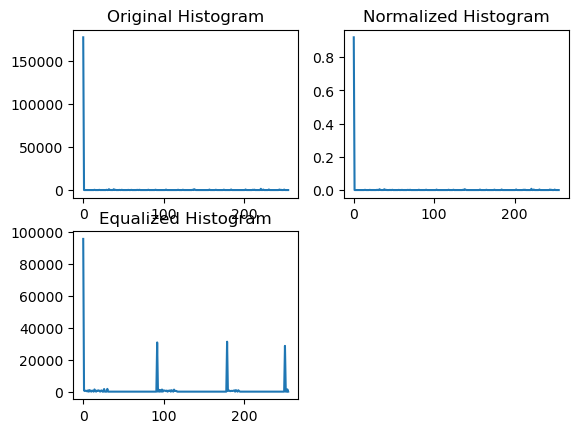

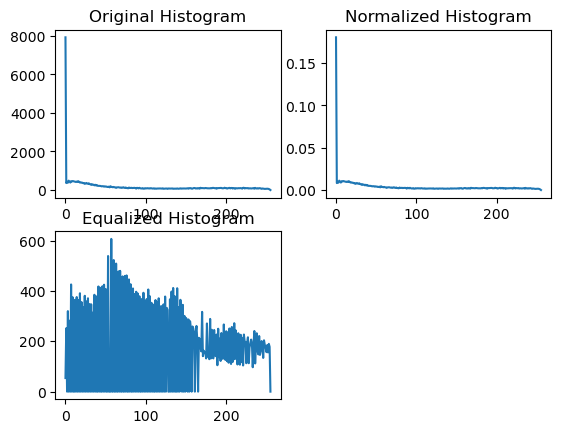

In [5]:
image_path = "../images/tj2.jpg"
kernel_size = 5
filtered_image = averaging_filter(image_path, kernel_size)
cv2.imwrite("../Output Images/ex4/Original Image.jpg", filtered_image[1])
cv2.waitKey(0)
cv2.imwrite("../Output Images/ex4/Averaging Filter.jpg", filtered_image[0])
cv2.waitKey(0)

kernel_size = 3
filtered_image = median_filter(image_path, kernel_size)
cv2.imwrite("../Output Images/ex4/Median Filter.jpg", filtered_image)
cv2.waitKey(0)

image_path = "../images/Picture1.png"
plot_histogram(image_path)
image_path = "../images/Picture2.png"
plot_histogram(image_path)